# Utils library

In [101]:
# Import necessary libraries
import numpy as np                      # For numerical operations, such as array manipulation and mathematical functions
import matplotlib.pyplot as plt         # For plotting and visualizing data with various types of charts
import pandas as pd                     # For data manipulation and analysis, particularly with DataFrames
from tensorflow import keras            # Import Keras module for building and training neural networks within TensorFlow
from tensorflow.keras import layers     # Import Keras layers module for creating various types of layers in neural networks

# Import specific Keras layers for building a Convolutional Neural Network (CNN)
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D

# Import the CIFAR-10 dataset from Keras, which includes 60,000 32x32 color images in 10 classes
from tensorflow.keras.datasets import cifar10

# Utility for converting class vectors (integers) to binary class matrices (one-hot encoding)
from tensorflow.keras.utils import to_categorical

# Import model types from Keras for building and managing neural network models
from tensorflow.keras.models import Sequential, Model

# Import the VGG16 model, a popular pre-trained model for transfer learning
from tensorflow.keras.applications import VGG16

# Import the TensorFlow library, which includes Keras and other tools for machine learning and neural networks
import tensorflow as tf


# Data mining

Loading data

In [74]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [75]:
# List of class names in the CIFAR-10 dataset
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Print the shape of the training data (features)
print('Training data shape:', x_train.shape)

# Print the shape of the test data (features)
print('Test data shape:', x_test.shape)

# Print the shape of the training labels
print('Training labels shape:', y_train.shape)

# Print the shape of the test labels
print('Test labels shape:', y_test.shape)


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (50000, 1)
Test labels shape: (10000, 1)


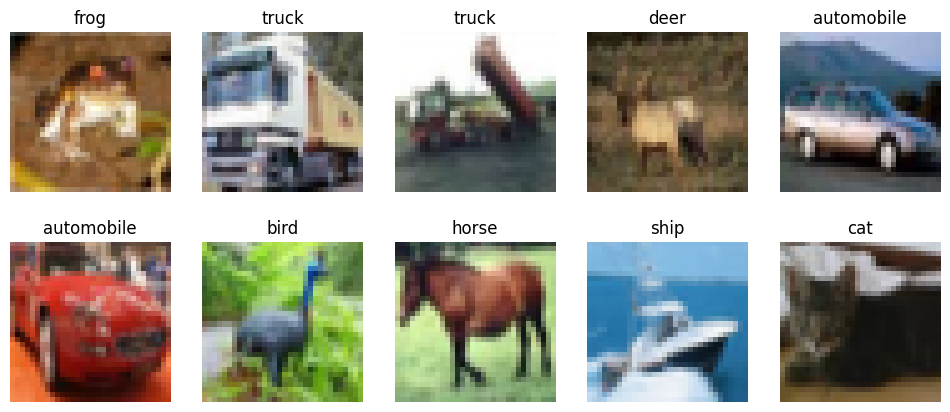

In [76]:
# Create a new figure with specified size for plotting
plt.figure(figsize=(12, 5))

# Loop to display the first 10 images in the training set
for i in range(10):
    # Create a subplot with 2 rows and 5 columns
    plt.subplot(2, 5, i + 1)

    # Display the ith image from the training set
    plt.imshow(x_train[i])

    # Set the title of the subplot to the corresponding class name
    plt.title(cifar10_classes[y_train[i][0]])

    # Remove the axis for better visualization
    plt.axis('off')

# Show the plot
plt.show()


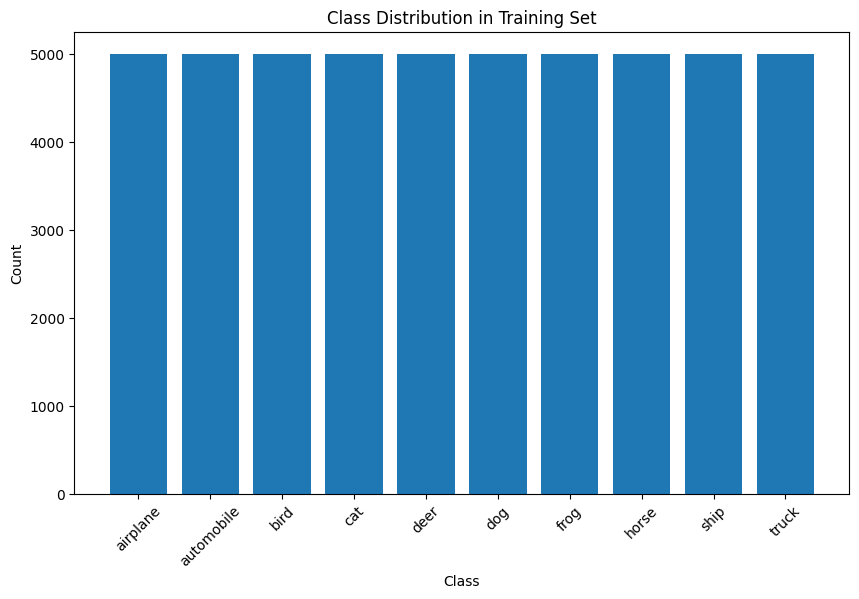

In [77]:
# Initialize a list to hold the count of each class in the training set
class_distribution = [0] * 10

# Loop to count the occurrences of each class in the training set
for label in y_train:
    class_distribution[label[0]] += 1

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
plt.bar(cifar10_classes, class_distribution)  # Create a bar plot with class names and their counts
plt.title('Class Distribution in Training Set')  # Set the title of the plot
plt.xlabel('Class')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()  # Display the plot

# Count the occurrences of each class in the training set


# data pre-processing

In [78]:
# Normalize the training data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0

# Normalize the test data to the range [0, 1]
x_test = x_test.astype('float32') / 255.0


In [79]:
# Define the number of classes in the dataset
num_classes = 10

# Convert the training labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes)

# Convert the test labels to one-hot encoded vectors
y_test = to_categorical(y_test, num_classes)


In [80]:
print('Training data shape:', x_train.shape)
print('Test data shape:', x_test.shape)
print('Training labels shape:', y_train.shape)
print('Test labels shape:', y_test.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (50000, 10)
Test labels shape: (10000, 10)


# MLP model


*   Model construction



In [81]:
# Import the necessary modules from Keras
from tensorflow.keras import layers, models

# Define a Sequential model for a Multi-Layer Perceptron (MLP)
model_mlp = models.Sequential([
    # Flatten the input images from 32x32 pixels with 3 color channels to a 1D vector
    layers.Flatten(input_shape=(32, 32, 3)),

    # Add a fully connected (dense) layer with 128 neurons
    # Using ReLU (Rectified Linear Unit) activation function for non-linearity
    layers.Dense(128, activation='relu'),

    # Add another fully connected (dense) layer with 64 neurons
    # Using ReLU activation function for non-linearity
    layers.Dense(64, activation='relu'),

    # Add the output layer with 10 neurons (one for each class in CIFAR-10 dataset)
    # Using softmax activation function to output probabilities for each class
    layers.Dense(10, activation='softmax')
])


In [82]:
# Compile the Multi-Layer Perceptron (MLP) model
model_mlp.compile(
    # Use the Adam optimizer, which adapts the learning rate during training
    optimizer='adam',

    # Set the loss function to categorical cross-entropy
    # Suitable for multi-class classification problems with one-hot encoded labels
    loss='categorical_crossentropy',

    # Specify the metrics to evaluate the model during training and testing
    # Here, we use accuracy to measure how often the model's predictions match the true labels
    metrics=['accuracy']
)


In [83]:
# Display a summary of the model architecture
# This includes details such as the type and number of layers, the output shape of each layer,
# and the number of parameters in the model.
model_mlp.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 3072)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               393344    
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Model training**

In [84]:
# Define the number of epochs and batch size for training
epochs = 100        # Number of times the entire dataset will be passed through the model
batch_size = 32     # Number of samples per gradient update

# Train the MLP model
history = model_mlp.fit(
    x_train,                # Training data
    y_train,                # Training labels
    epochs=10,              # Number of epochs to train the model
    batch_size=64,          # Number of samples per gradient update
    validation_split=0.2    # Fraction of the training data to be used as validation data
)

# Evaluate the trained model on the test data
test_loss, test_acc = model_mlp.evaluate(
    x_test,                 # Test data
    y_test,                 # Test labels
    verbose=2               # Verbosity mode (2: detailed progress messages)
)

# Print the test accuracy as a percentage
print(f'Test accuracy: {test_acc*100:.2f}%')


Epoch 1/10
625/625 [==============================] - 7s 10ms/step - loss: 1.8884 - accuracy: 0.3152 - val_loss: 1.7830 - val_accuracy: 0.3600
Epoch 2/10
625/625 [==============================] - 5s 9ms/step - loss: 1.7276 - accuracy: 0.3813 - val_loss: 1.7165 - val_accuracy: 0.3937
Epoch 3/10
625/625 [==============================] - 7s 11ms/step - loss: 1.6542 - accuracy: 0.4081 - val_loss: 1.6546 - val_accuracy: 0.4111
Epoch 4/10
625/625 [==============================] - 5s 9ms/step - loss: 1.6001 - accuracy: 0.4270 - val_loss: 1.6537 - val_accuracy: 0.4116
Epoch 5/10
625/625 [==============================] - 7s 11ms/step - loss: 1.5677 - accuracy: 0.4393 - val_loss: 1.6221 - val_accuracy: 0.4245
Epoch 6/10
625/625 [==============================] - 5s 9ms/step - loss: 1.5431 - accuracy: 0.4491 - val_loss: 1.5677 - val_accuracy: 0.4447
Epoch 7/10
625/625 [==============================] - 7s 10ms/step - loss: 1.5185 - accuracy: 0.4584 - val_loss: 1.5791 - val_accuracy: 0.4431
Ep

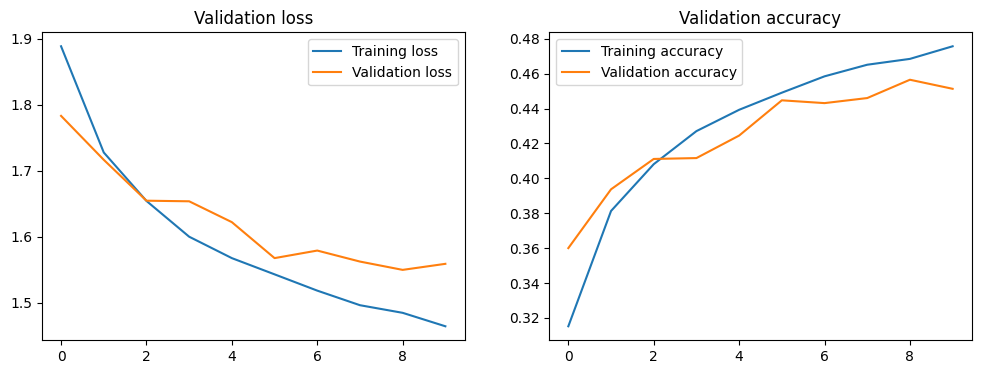

Precision on test data: 46.03%


In [85]:
# Create a new figure with specified size for plotting
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)  # Create a subplot with 1 row and 2 columns, selecting the first subplot
plt.plot(history.history['loss'], label='Training loss')  # Plot training loss over epochs
plt.plot(history.history['val_loss'], label='Validation loss')  # Plot validation loss over epochs
plt.legend()  # Show the legend to differentiate between training and validation loss
plt.title('Validation loss')  # Set the title for the subplot

# Plot training and validation accuracy
plt.subplot(1, 2, 2)  # Create a subplot with 1 row and 2 columns, selecting the second subplot
plt.plot(history.history['accuracy'], label='Training accuracy')  # Plot training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation accuracy')  # Plot validation accuracy over epochs
plt.legend()  # Show the legend to differentiate between training and validation accuracy
plt.title('Validation accuracy')  # Set the title for the subplot

# Display the plots
plt.show()

# Print the test accuracy as a percentage
print(f'Precision on test data: {test_acc*100:.2f}%')


In [86]:
# Define an array with class names corresponding to CIFAR-10 dataset labels
CLASSES = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
])

# Predict the class probabilities for the test dataset using the trained model
predictions = model_mlp.predict(x_test)

# Convert the predicted probabilities to class labels
# np.argmax returns the index of the maximum value along an axis (axis=1 for class probabilities)
predictions_simples = CLASSES[np.argmax(predictions, axis=1)]

# Convert the one-hot encoded true labels to class labels
# np.argmax returns the index of the maximum value along an axis (axis=1 for one-hot encoded labels)
true_classes_simples = CLASSES[np.argmax(y_test, axis=1)]


313/313 [==============================] - 1s 2ms/step


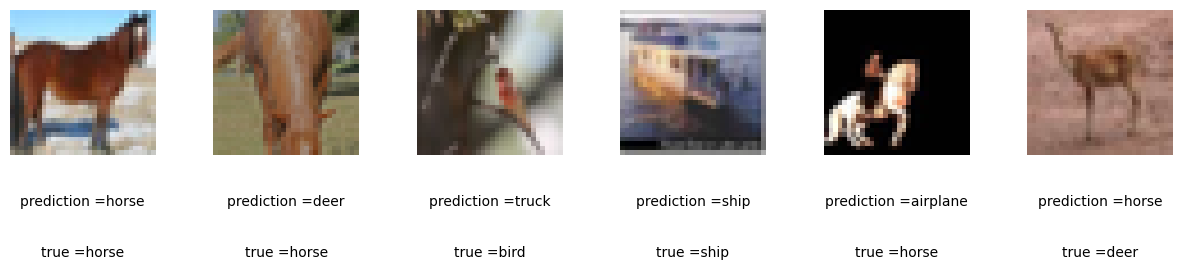

In [87]:
# Number of images to display
n_a_show = 6

# Randomly select indices from the test set to display
indices = np.random.choice(len(x_test), n_a_show)

# Create a new figure with a specified size for plotting
fig = plt.figure(figsize=(15, 3))

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Loop over the selected indices to display the images
for i, index in enumerate(indices):
    # Get the image corresponding to the selected index
    image = x_test[index]

    # Add a subplot to the figure; layout is 1 row by n_a_show columns
    ax = fig.add_subplot(1, n_a_show, i + 1)

    # Remove axis for better visualization of images
    ax.axis('off')

    # Add text to the subplot for predicted class label
    ax.text(
        0.5,  # x-coordinate (relative to the subplot)
        -0.35,  # y-coordinate (relative to the subplot)
        "prediction =" + str(predictions_simples[index]),  # Text for predicted class
        fontsize=10,  # Font size of the text
        ha="center",  # Horizontal alignment of the text
        transform=ax.transAxes,  # Positioning the text relative to the subplot axes
    )

    # Add text to the subplot for true class label
    ax.text(
        0.5,  # x-coordinate (relative to the subplot)
        -0.7,  # y-coordinate (relative to the subplot)
        "true =" + str(true_classes_simples[index]),  # Text for true class
        fontsize=10,  # Font size of the text
        ha="center",  # Horizontal alignment of the text
        transform=ax.transAxes,  # Positioning the text relative to the subplot axes
    )

    # Display the image in the subplot
    ax.imshow(image)

# Show the plot with all subplots
plt.show()


# Convolutional neural network
* Model training

In [88]:
# Define a Sequential model for a Convolutional Neural Network (CNN)
model_cnn = Sequential()

# Add a 2D convolutional layer with 32 filters, each of size 3x3
# ReLU activation function is used for introducing non-linearity
# Input shape is (32, 32, 3) which corresponds to the CIFAR-10 image dimensions (32x32 pixels with 3 color channels)
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add a max pooling layer to reduce the spatial dimensions (height and width) by a factor of 2
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Add another 2D convolutional layer with 64 filters, each of size 3x3
# ReLU activation function is used
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))

# Add another max pooling layer to reduce the spatial dimensions further
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))  # Fixed syntax: changed from 'pool_size(2, 2)' to 'pool_size=(2, 2)'

# Flatten the 3D output from the convolutional layers into a 1D vector
model_cnn.add(Flatten())

# Add a fully connected (dense) layer with 128 neurons and ReLU activation function
model_cnn.add(Dense(128, activation='relu'))

# Add a dropout layer to reduce overfitting by randomly setting 50% of the input units to zero during training
model_cnn.add(Dropout(0.5))  # Fixed typo: changed from 'DRowpout' to 'Dropout'

# Add the output layer with 10 neurons (one for each class) and softmax activation function
# Softmax is used to output probabilities for each class
model_cnn.add(Dense(10, activation='softmax'))


In [89]:
# Compile the Convolutional Neural Network (CNN) model
model_cnn.compile(
    # Use the Adam optimizer, which adapts the learning rate during training
    optimizer='adam',

    # Set the loss function to categorical cross-entropy
    # This is suitable for multi-class classification problems with one-hot encoded labels
    loss='categorical_crossentropy',

    # Specify the metrics to evaluate the model during training and testing
    # Here, we use accuracy to measure how often the model's predictions match the true labels
    metrics=['accuracy']
)


In [90]:
# Define the number of epochs (iterations over the entire training dataset)
epochs = 10

# Define the batch size (number of samples processed before the model's internal parameters are updated)
batch_size = 64

# Train the Convolutional Neural Network (CNN) model
history = model_cnn.fit(
    x_train,                # Training data
    y_train,                # Training labels (one-hot encoded)
    epochs=epochs,          # Number of epochs to train the model
    batch_size=batch_size,  # Number of samples per gradient update
    validation_split=0.2,   # Fraction of the training data to be used as validation data
    shuffle=True            # Shuffle the training data before each epoch to improve training dynamics
)

# Evaluate the trained model on the test dataset
test_loss, test_acc = model_cnn.evaluate(
    x_test,                 # Test data
    y_test,                 # Test labels (one-hot encoded)
    verbose=2               # Verbosity mode; 2 means detailed progress messages
)

# Optional: Print the test loss and accuracy for reference
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc*100:.2f}%')


Epoch 1/10
625/625 [==============================] - 49s 77ms/step - loss: 1.7153 - accuracy: 0.3709 - val_loss: 1.4215 - val_accuracy: 0.5020
Epoch 2/10
625/625 [==============================] - 47s 76ms/step - loss: 1.3973 - accuracy: 0.4998 - val_loss: 1.2062 - val_accuracy: 0.5762
Epoch 3/10
625/625 [==============================] - 51s 82ms/step - loss: 1.2640 - accuracy: 0.5504 - val_loss: 1.1297 - val_accuracy: 0.6027
Epoch 4/10
625/625 [==============================] - 46s 74ms/step - loss: 1.1800 - accuracy: 0.5845 - val_loss: 1.0625 - val_accuracy: 0.6295
Epoch 5/10
625/625 [==============================] - 51s 81ms/step - loss: 1.1233 - accuracy: 0.6030 - val_loss: 1.0269 - val_accuracy: 0.6380
Epoch 6/10
625/625 [==============================] - 48s 77ms/step - loss: 1.0648 - accuracy: 0.6245 - val_loss: 0.9621 - val_accuracy: 0.6652
Epoch 7/10
625/625 [==============================] - 46s 73ms/step - loss: 1.0118 - accuracy: 0.6423 - val_loss: 0.9586 - val_accuracy:

313/313 - 3s - loss: 0.9245 - accuracy: 0.6790 - 3s/epoch - 9ms/step
test data accuracy: 67.900002%


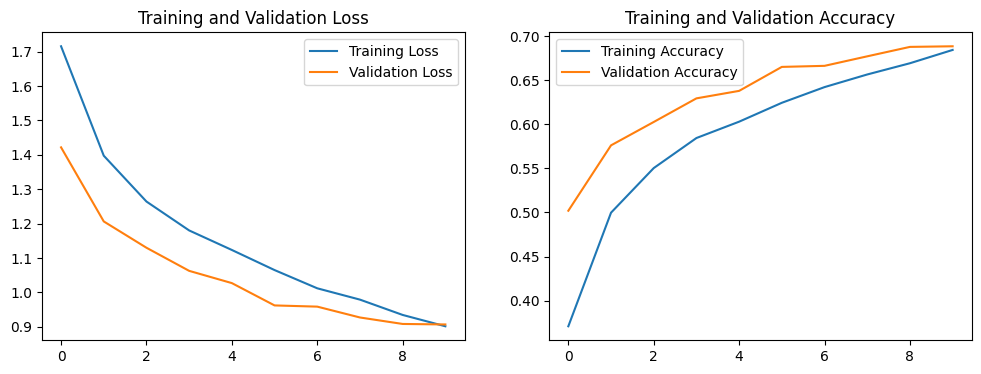

In [91]:
test_loss, test_acc = model_cnn.evaluate(
    x_test,                 # Test data
    y_test,                 # Test labels (one-hot encoded)
    verbose=2               # Verbosity mode; 2 means detailed progress messages
)
print(f'test data accuracy: {test_acc*100:2f}%')

# Create a new figure for plotting with a specified size
plt.figure(figsize=(12, 4))  # Fixed argument: changed 'figure' to 'figsize'

# Create a subplot for the training and validation loss
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss over epochs
plt.legend()  # Show legend to distinguish between training and validation loss
plt.title('Training and Validation Loss')  # Set title for the subplot

# Create a subplot for the training and validation accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy over epochs
plt.legend()  # Show legend to distinguish between training and validation accuracy
plt.title('Training and Validation Accuracy')  # Set title for the subplot

# Display the plots
plt.show()


In [92]:
# Define an array with class names corresponding to CIFAR-10 dataset labels
CLASSES = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
])

# Predict the class probabilities for the test dataset using the trained CNN model
predictions = model_cnn.predict(x_test)

# Convert the predicted probabilities to class labels
# np.argmax returns the index of the maximum value along the specified axis
# axis=1 indicates that we want the index of the highest probability for each sample
predictions_simples = CLASSES[np.argmax(predictions, axis=1)]

# Convert the one-hot encoded true labels to class labels
# np.argmax returns the index of the maximum value along the specified axis
# axis=1 indicates that we want the index of the highest probability for each sample
true_classes_simples = CLASSES[np.argmax(y_test, axis=1)]


313/313 [==============================] - 3s 10ms/step


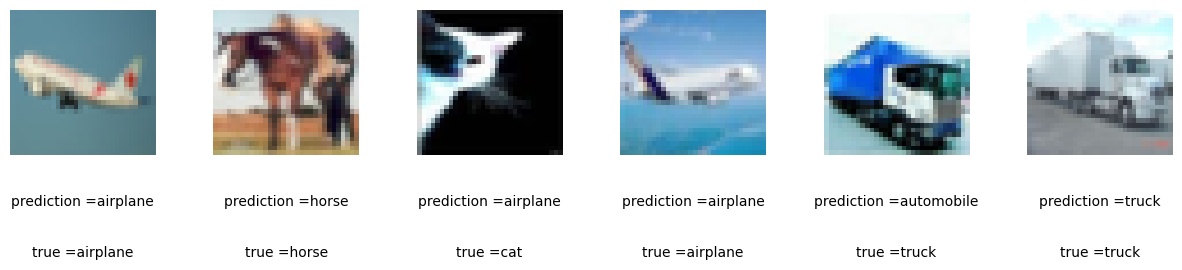

In [93]:
# Number of images to display
n_a_show = 6

# Randomly select indices from the test set to display
indices = np.random.choice(len(x_test), n_a_show)

# Create a new figure with a specified size for plotting
fig = plt.figure(figsize=(15, 3))

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Loop over the selected indices to display the images
for i, index in enumerate(indices):
    # Get the image corresponding to the selected index
    image = x_test[index]

    # Add a subplot to the figure; layout is 1 row by n_a_show columns
    ax = fig.add_subplot(1, n_a_show, i + 1)

    # Remove axis for better visualization of images
    ax.axis('off')

    # Add text to the subplot for predicted class label
    ax.text(
        0.5,  # x-coordinate (relative to the subplot)
        -0.35,  # y-coordinate (relative to the subplot)
        "prediction =" + str(predictions_simples[index]),  # Text for predicted class
        fontsize=10,  # Font size of the text
        ha="center",  # Horizontal alignment of the text
        transform=ax.transAxes,  # Positioning the text relative to the subplot axes
    )

    # Add text to the subplot for true class label
    ax.text(
        0.5,  # x-coordinate (relative to the subplot)
        -0.7,  # y-coordinate (relative to the subplot)
        "true =" + str(true_classes_simples[index]),  # Text for true class
        fontsize=10,  # Font size of the text
        ha="center",  # Horizontal alignment of the text
        transform=ax.transAxes,  # Positioning the text relative to the subplot axes
    )

    # Display the image in the subplot
    ax.imshow(image)

# Show the plot with all subplots
plt.show()


# Other CNN

In [94]:
# Define the number of classes in the CIFAR-10 dataset
NUM_CLASSES = 10

# Initialize a Sequential model
model_cnn = models.Sequential()

# Add a 2D convolutional layer with 32 filters, each of size 3x3
# Strides of 1 and 'same' padding means the output feature map has the same width and height as the input
# LeakyReLU activation allows a small, non-zero gradient when the input is negative
model_cnn.add(layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(layers.BatchNormalization())  # Normalize activations to improve training stability
model_cnn.add(layers.LeakyReLU())  # Apply Leaky ReLU activation function

# Add a second 2D convolutional layer with 32 filters, each of size 3x3
# Strides of 2 and 'same' padding reduces the spatial dimensions (height and width) by a factor of 2
model_cnn.add(layers.Conv2D(32, (3, 3), strides=2, padding='same'))
model_cnn.add(layers.BatchNormalization())  # Normalize activations
model_cnn.add(layers.LeakyReLU())  # Apply Leaky ReLU activation function

# Add a third 2D convolutional layer with 64 filters, each of size 3x3
# Strides of 1 and 'same' padding keeps the spatial dimensions unchanged
model_cnn.add(layers.Conv2D(64, (3, 3), strides=1, padding='same'))
model_cnn.add(layers.BatchNormalization())  # Normalize activations
model_cnn.add(layers.LeakyReLU())  # Apply Leaky ReLU activation function

# Add a fourth 2D convolutional layer with 64 filters, each of size 3x3
# Strides of 1 and 'same' padding keeps the spatial dimensions unchanged
model_cnn.add(layers.Conv2D(64, (3, 3), strides=1, padding='same'))
model_cnn.add(layers.BatchNormalization())  # Normalize activations
model_cnn.add(layers.LeakyReLU())  # Apply Leaky ReLU activation function

# Flatten the 3D output from the convolutional layers into a 1D vector
model_cnn.add(layers.Flatten())

# Add a fully connected (dense) layer with 128 neurons
model_cnn.add(layers.Dense(128))
model_cnn.add(layers.BatchNormalization())  # Normalize activations
model_cnn.add(layers.LeakyReLU())  # Apply Leaky ReLU activation function

# Add a dropout layer with a rate of 0.5 to reduce overfitting
model_cnn.add(layers.Dropout(rate=0.5))

# Add the output layer with 'NUM_CLASSES' neurons (one for each class)
# Softmax activation function converts the output to probabilities
model_cnn.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# Print a summary of the model architecture
model_cnn.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_6 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 16, 16, 32)       

In [95]:
model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [96]:
epochs = 10
batch_size = 64

history_cnn = model_cnn.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    shuffle=True
)

test_loss, test_acc = model_cnn.evaluate(
    x_test,
    y_test,
    verbose=2
)

print(f'Test accuracy: {test_acc*100:.2f}%')

Epoch 1/10
625/625 [==============================] - 195s 308ms/step - loss: 1.4752 - accuracy: 0.4837 - val_loss: 1.3216 - val_accuracy: 0.5433
Epoch 2/10
625/625 [==============================] - 185s 296ms/step - loss: 1.0842 - accuracy: 0.6175 - val_loss: 1.0985 - val_accuracy: 0.6118
Epoch 3/10
625/625 [==============================] - 198s 317ms/step - loss: 0.9474 - accuracy: 0.6677 - val_loss: 1.2252 - val_accuracy: 0.5922
Epoch 4/10
625/625 [==============================] - 213s 341ms/step - loss: 0.8620 - accuracy: 0.6987 - val_loss: 1.0077 - val_accuracy: 0.6478
Epoch 5/10
625/625 [==============================] - 191s 306ms/step - loss: 0.7988 - accuracy: 0.7181 - val_loss: 0.8659 - val_accuracy: 0.6996
Epoch 6/10
625/625 [==============================] - 183s 293ms/step - loss: 0.7552 - accuracy: 0.7359 - val_loss: 1.0502 - val_accuracy: 0.6455
Epoch 7/10
625/625 [==============================] - 174s 278ms/step - loss: 0.7022 - accuracy: 0.7551 - val_loss: 0.8904 -

313/313 - 11s - loss: 0.8411 - accuracy: 0.7254 - 11s/epoch - 35ms/step
test data accuracy: 72.539997%


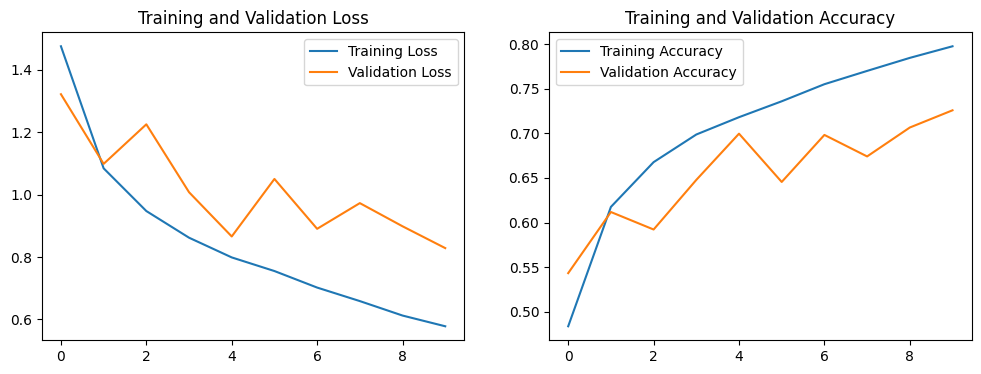

In [97]:
test_loss, test_acc = model_cnn.evaluate(
    x_test,                 # Test data
    y_test,                 # Test labels (one-hot encoded)
    verbose=2               # Verbosity mode; 2 means detailed progress messages
)
print(f'test data accuracy: {test_acc*100:2f}%')

# Create a new figure for plotting with a specified size
plt.figure(figsize=(12, 4))  # Fixed argument: changed 'figure' to 'figsize'

# Create a subplot for the training and validation loss
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history_cnn.history['loss'], label='Training Loss')  # Plot training loss over epochs
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')  # Plot validation loss over epochs
plt.legend()  # Show legend to distinguish between training and validation loss
plt.title('Training and Validation Loss')  # Set title for the subplot

# Create a subplot for the training and validation accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')  # Plot training accuracy over epochs
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy over epochs
plt.legend()  # Show legend to distinguish between training and validation accuracy
plt.title('Training and Validation Accuracy')  # Set title for the subplot

# Display the plots
plt.show()


In [98]:
# Define an array with class names corresponding to CIFAR-10 dataset labels
CLASSES = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
])

# Predict the class probabilities for the test dataset using the trained CNN model
predictions = model_cnn.predict(x_test)

# Convert the predicted probabilities to class labels
# np.argmax returns the index of the maximum value along the specified axis
# axis=1 indicates that we want the index of the highest probability for each sample
predictions_simples = CLASSES[np.argmax(predictions, axis=1)]

# Convert the one-hot encoded true labels to class labels
# np.argmax returns the index of the maximum value along the specified axis
# axis=1 indicates that we want the index of the highest probability for each sample
true_classes_simples = CLASSES[np.argmax(y_test, axis=1)]


313/313 [==============================] - 11s 33ms/step


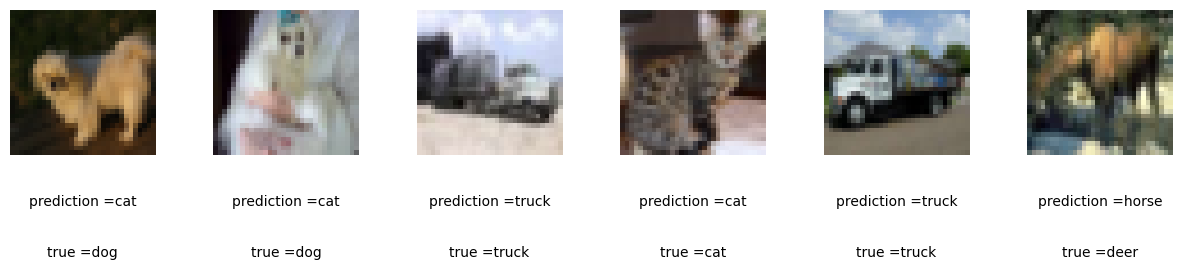

In [99]:
# Number of images to display
n_a_show = 6

# Randomly select indices from the test set to display
indices = np.random.choice(len(x_test), n_a_show)

# Create a new figure with a specified size for plotting
fig = plt.figure(figsize=(15, 3))

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Loop over the selected indices to display the images
for i, index in enumerate(indices):
    # Get the image corresponding to the selected index
    image = x_test[index]

    # Add a subplot to the figure; layout is 1 row by n_a_show columns
    ax = fig.add_subplot(1, n_a_show, i + 1)

    # Remove axis for better visualization of images
    ax.axis('off')

    # Add text to the subplot for predicted class label
    ax.text(
        0.5,  # x-coordinate (relative to the subplot)
        -0.35,  # y-coordinate (relative to the subplot)
        "prediction =" + str(predictions_simples[index]),  # Text for predicted class
        fontsize=10,  # Font size of the text
        ha="center",  # Horizontal alignment of the text
        transform=ax.transAxes,  # Positioning the text relative to the subplot axes
    )

    # Add text to the subplot for true class label
    ax.text(
        0.5,  # x-coordinate (relative to the subplot)
        -0.7,  # y-coordinate (relative to the subplot)
        "true =" + str(true_classes_simples[index]),  # Text for true class
        fontsize=10,  # Font size of the text
        ha="center",  # Horizontal alignment of the text
        transform=ax.transAxes,  # Positioning the text relative to the subplot axes
    )

    # Display the image in the subplot
    ax.imshow(image)

# Show the plot with all subplots
plt.show()


# Model using transfer learning VGG16

In [102]:
# Load the VGG16 model pre-trained on the ImageNet dataset
# 'weights='imagenet'': Use the pre-trained weights learned from training on ImageNet
# 'include_top=False': Exclude the final fully connected layers (classification layers)
# 'input_shape=(32, 32, 3)': Specify the input shape of the images, here 32x32 pixels with 3 color channels (RGB)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [103]:
# Extract the output from the base VGG16 model
x = base_model.output

# Apply Global Average Pooling to reduce the dimensionality of the feature maps
# This operation computes the average of each feature map, resulting in a 1D vector for each feature map
x = GlobalAveragePooling2D()(x)

# Add a fully connected (Dense) layer with 1024 neurons and ReLU activation function
# This layer helps the model learn complex representations from the pooled features
x = Dense(1024, activation='relu')(x)

# Add a Dropout layer with a rate of 0.5
# This layer randomly sets 50% of the input units to zero during training to prevent overfitting
x = Dropout(0.5)(x)

# Add the final output layer with 'num_classes' neurons and softmax activation function
# 'num_classes' should be set to the number of classes in your dataset
# Softmax activation converts the outputs into probabilities, summing to 1, for classification
predictions = Dense(num_classes, activation='softmax')(x)


In [104]:
# Create a new Keras Model instance with the base VGG16 model as input and the custom classification head as output
# This model combines the pre-trained feature extractor with the new classification layers
model_transfer = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base VGG16 model to prevent them from being updated during training
# This ensures that the pre-trained weights of the VGG16 model are preserved
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with the Adam optimizer, categorical crossentropy loss function, and accuracy as a metric
# 'adam' optimizer is an adaptive learning rate optimizer that adjusts the learning rate based on the training data
# 'categorical_crossentropy' is used as the loss function for multi-class classification problems
# 'accuracy' is used as a metric to evaluate the performance of the model during training and testing
model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
epochs = 10
batch_size = 64

history_transfer = model_transfer.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    shuffle=True
)

test_loss, test_acc = model_transfer.evaluate(
    x_test,
    y_test,
    verbose=2
)

print(f'Test accuracy: {test_acc*100:.2f}%')
